In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/Dacon/Arirang/Practice'

/content/gdrive/My Drive/Dacon/Arirang/Practice


초기설정
----------

In [ ]:
!git clone https://github.com/dingjiansw101/AerialDetection.git

Cloning into 'AerialDetection'...
remote: Enumerating objects: 848, done.
remote: Total 848 (delta 0), reused 0 (delta 0), pack-reused 848
Receiving objects: 100% (848/848), 2.39 MiB | 10.42 MiB/s, done.
Resolving deltas: 100% (474/474), done.
Checking out files: 100% (424/424), done.


In [ ]:
%cd AerialDetection

/content/gdrive/My Drive/Dacon/Arirang/Practice/AerialDetection


In [ ]:
!chmod 755 compile.sh

In [ ]:
%%bash
./compile.sh

In [ ]:
!pip install -r requirements.txt > /dev/null

In [ ]:
!python setup.py develop > /dev/null

In [ ]:
!apt-get -y install swig > /dev/null

In [ ]:
%cd DOTA_devkit

/content/gdrive/My Drive/Dacon/Arirang/Practice/AerialDetection/DOTA_devkit


In [ ]:
!swig -c++ -python polyiou.i

In [ ]:
!python3 setup.py build_ext --inplace

running build_ext
building '_polyiou' extension
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c polyiou_wrap.cxx -o build/temp.linux-x86_64-3.6/polyiou_wrap.o
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -c polyiou.cpp -o build/temp.linux-x86_64-3.6/polyiou.o
polyiou.cpp: In function ‘double intersectArea(Point, Point, Point, Point)’:
polyiou.cpp:88:5: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
     if(s1*s2==-1) res=-res;return res;
     ^~
polyiou.cpp:88:28: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘if’
     if(s1*s2==-1) res=-res;return res;
                            ^~~~~~
x

In [ ]:
import os
from DOTA import DOTA
import dota_utils as util
import pylab

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

Sample Image Show and Anns
----------

In [ ]:
# before doing this, must download some pictures and labelTxts.
data_path = './example'
train_data = DOTA(data_path)
train_data

In [ ]:
'''categories = ['plane', 'ship', 'storage tank', 'baseball diamond', 'tennis court', 'basketball court', 'ground track field', 'harbor', 'bridge', 'large vehicle', 'small vehicle', 'helicopter', 'roundabout', 'soccer ball field', 'swimming pool']
len(categories)'''

15

In [ ]:
categories = ['ship', 'storage-tank', 'bridge', 'harbor']

In [ ]:
imgids = train_data.getImgIds(catNms=categories)
imgid = imgids[0]
img = train_data.loadImgs(imgid)[0]

isarralike: False
imgids: ['P1234']
filename: ./example/images/P1234.png


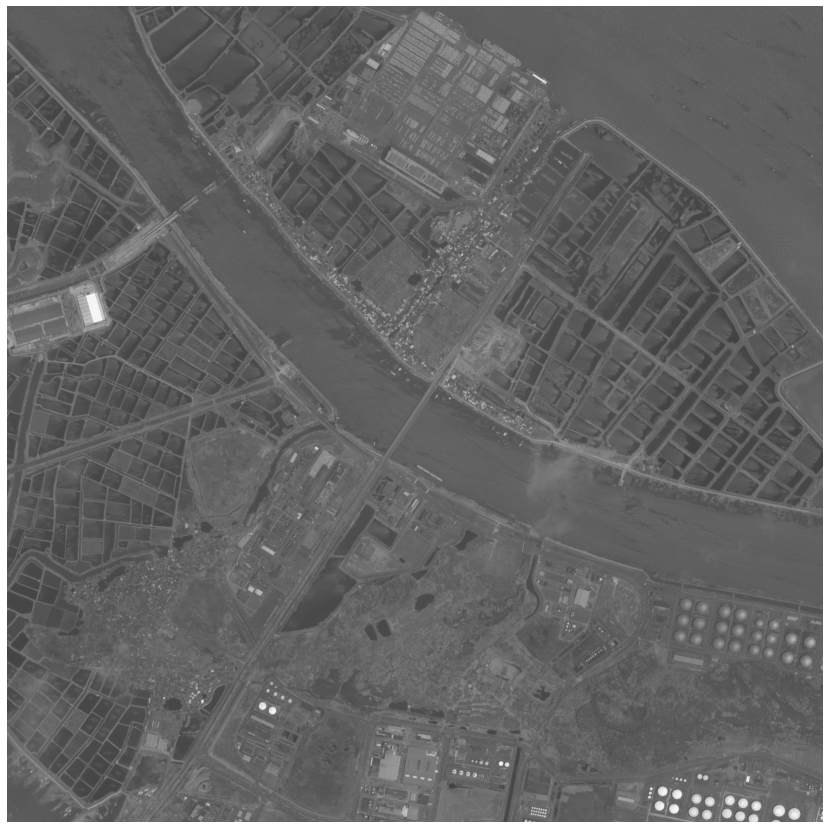

In [ ]:
plt.axis('off')

plt.imshow(img)
plt.show()

isarralike: False
imgids: ['P1234']
filename: ./example/images/P1234.png


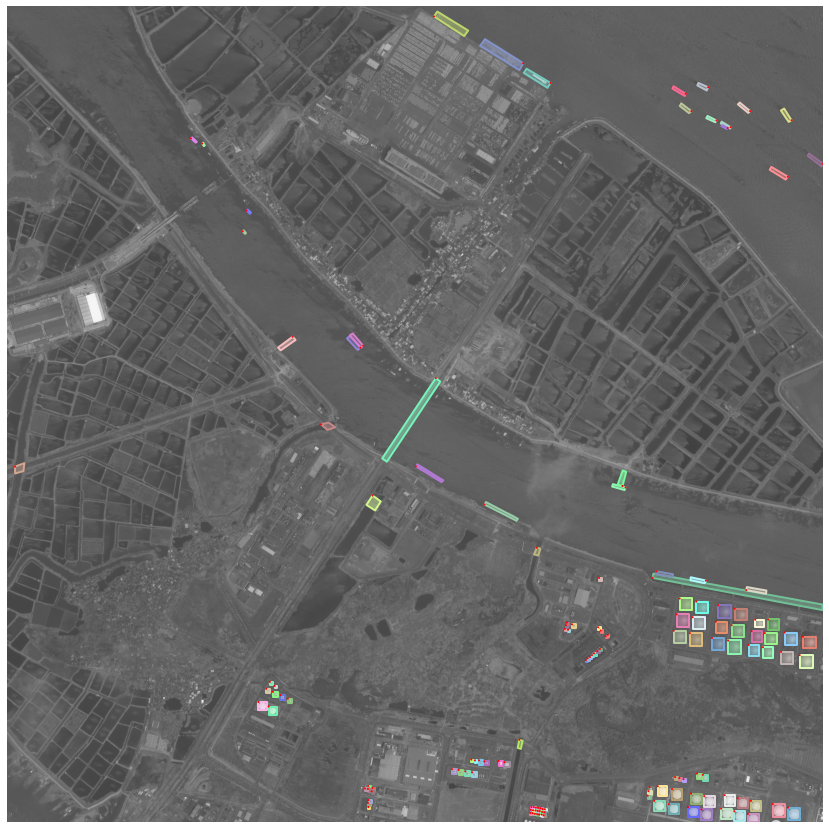

In [ ]:
anns = train_data.loadAnns(imgId=imgid)
# print(anns)
train_data.showAnns(anns, imgid, 2)

Sample Image Patch Split
--------

In [ ]:
!mkdir examplesplit

In [ ]:
from ImgSplit import splitbase

In [ ]:
split = splitbase(r'example', 
                 r'examplesplit', choosebestpoint=True)
split.splitdata(0.5)
split.splitdata(1)
split.splitdata(2)

padding: True


In [ ]:
examplesplit = DOTA('./examplesplit')

In [ ]:
imgids = examplesplit.getImgIds(catNms=['plane'])
imgid = imgids[1]
img = examplesplit.loadImgs(imgid)[0]

isarralike: False
imgids: ['P1088__1__575___512']
filename: ./examplesplit/images/P1088__1__575___512.png


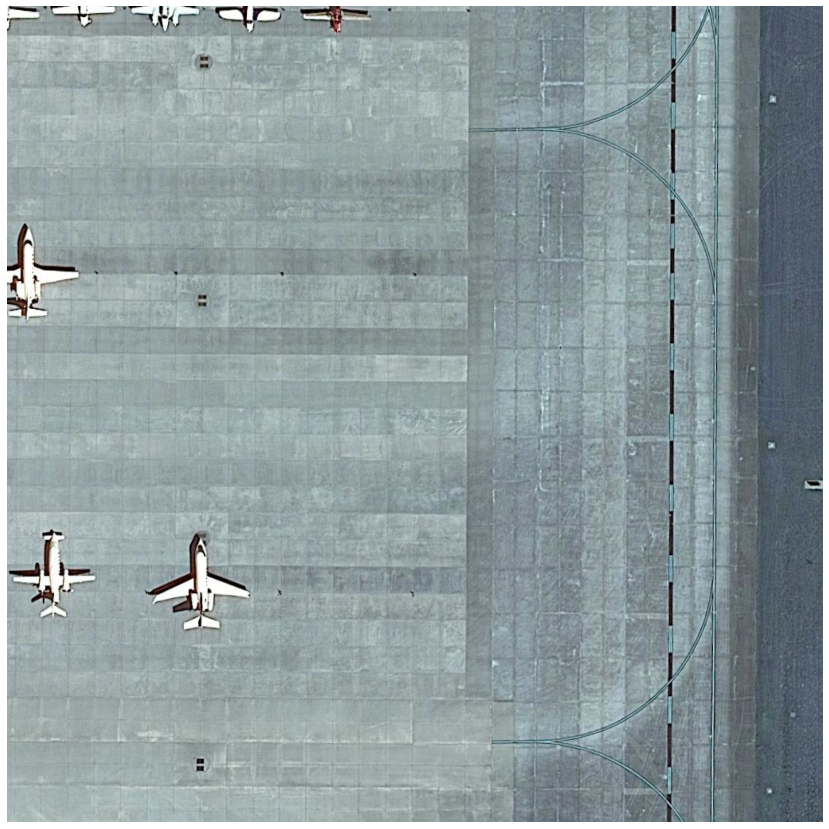

In [ ]:
plt.axis('off')

plt.imshow(img)
plt.show()

isarralike: False
imgids: ['P1088__1__575___512']
filename: ./examplesplit/images/P1088__1__575___512.png


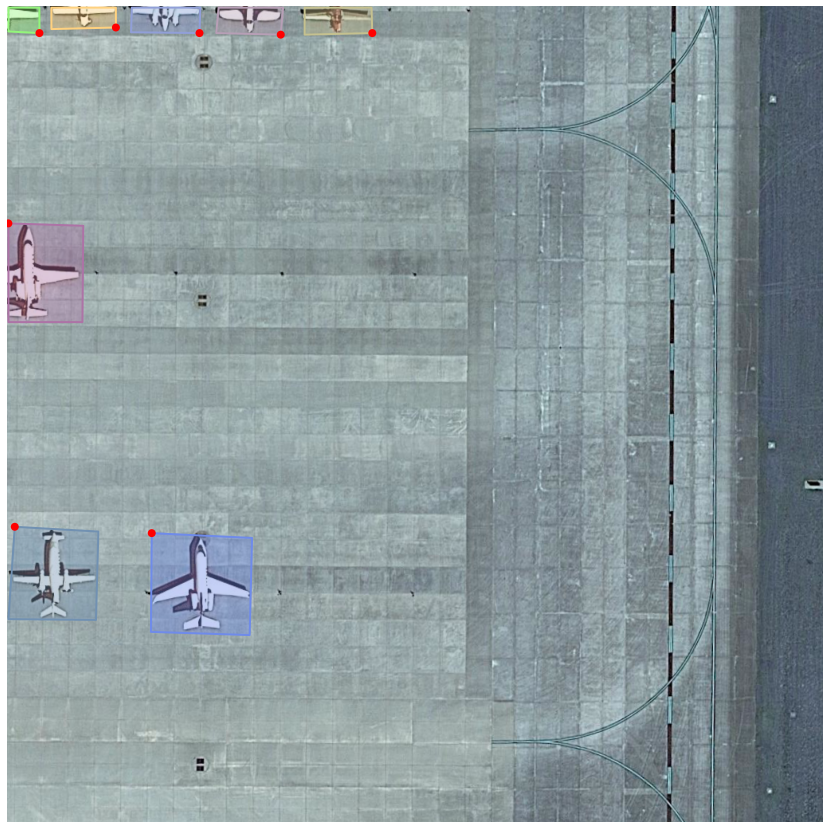

In [ ]:
anns = examplesplit.loadAnns(imgId=imgid)
# print(anns)
examplesplit.showAnns(anns, imgid, 2)

DOTA practice
--------

In [ ]:
%cd ..

/content/gdrive/My Drive/Dacon/Arirang/Practice


In [ ]:
!git clone https://github.com/yijingru/BBAVectors-Oriented-Object-Detection

Cloning into 'BBAVectors-Oriented-Object-Detection'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 104 (delta 50), reused 72 (delta 25), pack-reused 0
Receiving objects: 100% (104/104), 156.81 KiB | 985.00 KiB/s, done.
Resolving deltas: 100% (50/50), done.


In [3]:
%cd BBAVectors-Oriented-Object-Detection
!dir

/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection
datasets      func_utils.py  merge_dota   result_dota	  weights_dota
decoder.py    imgs	     models	  test
DOTA_dataset  LICENSE	     nms.py	  test.py
draw_loss.py  loss.py	     __pycache__  train_datasets
eval.py       main.py	     README.md	  train.py


Trans Our Data to DOTA_labelTxt format

In [ ]:
%cd ..

/


In [ ]:
from tqdm import tqdm
import glob
import json

train_datasets

In [ ]:
path_train = '/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection/train_datasets/'
path_json_train = path_train + 'json' 
path_txt_train = path_train + 'labelTxt/'

In [ ]:
def transform_dataset(path, path_json, path_txt):
    files_jsons = glob.glob(path_json+ '/*.json')
    tqdm_map = {pat : i+1 for i, pat in enumerate(files_jsons)}
    trainval = open(path + 'trainval.txt', 'w')
    for path_json in tqdm(tqdm_map, desc='converting jsons to labelTxt'):
        #label = json.load(open(path_json))
        file_name = path_json.split('/')[-1][:-5]
        trainval.write(file_name + '\n')
        #TXT = open(path_txt + file_name + '.txt', 'w')
        #TXT.write('imagesource:GoogleEarth\n')
        '''for target in label['features']:
            if target['properties']['type_name'] != 'etc':
                line = target['properties']['object_imcoords'].replace(',',' ') + ' ' + target['properties']['type_name'].replace(' ','') + ' ' + '1\n'
                TXT.write(line)'''
    return 

transform_dataset(path_train, path_json_train, path_txt_train)

converting jsons to labelTxt: 100%|██████████| 1200/1200 [00:00<00:00, 831378.39it/s]


test

In [ ]:
path_test = '/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection/test/'
path_img_test = path_test + 'images' 

In [ ]:
def transform_dataset2(path, path_img):
    files_imgs = glob.glob(path_img+ '/*.png')
    testval = open(path + 'test.txt', 'w')
    for path_img in files_imgs:
        file_name = path_img.split('/')[-1][:-4]
        testval.write(file_name + '\n')
        print(file_name)
    return 

transform_dataset2(path_test, path_img_test)

DOTA_dataset unzip

In [ ]:
%cd '/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection'
!dir

/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection
datasets      func_utils.py  merge_dota   result_dota	  weights_dota
decoder.py    imgs	     models	  test
DOTA_dataset  LICENSE	     nms.py	  test.py
draw_loss.py  loss.py	     __pycache__  train_datasets
eval.py       main.py	     README.md	  train.py


train from nothing

In [ ]:
!python main.py --data_dir 'train_datasets/' --num_epoch '100' --batch_size '8' --dataset 'dota' --phase 'train'

Setting up data...
Starting training...
------------------------------
Epoch: 1/100 
train loss: 5.721439984639486 , elapsed time : 417.6039412021637
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
------------------------------
Epoch: 2/100 
train loss: 4.149884200890859 , elapsed time : 110.34290480613708
------------------------------
Epoch: 3/100 
train loss: 3.636432650089264 , elapsed time : 110.24698066711426
------------------------------
Epoch: 4/100 
train loss: 3.48743147611618 , elap

train the pretrained model

In [23]:
!python main.py --data_dir 'train_datasets/' --num_epoch '120' --batch_size '8' --dataset 'dota' --phase 'train' --train_from 'True' --resume 'pretrained_50.pth'

loaded weights from weights_dota/pretrained_50.pth, epoch 50
Setting up data...
Starting training...
------------------------------
Epoch: 50/120 
train loss: 3.3201946699619294 , elapsed time : 109.91528248786926
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
------------------------------
Epoch: 51/120 
train loss: 2.6652536269028984 , elapsed time : 110.48381423950195
------------------------------
Epoch: 52/120 
train loss: 2.370475612084071 , elapsed time : 110.40173316001892
-------------

In [ ]:
%cd datasets/DOTA_devkit
!sudo apt-get install swig
!swig -c++ -python polyiou.i
!python setup.py build_ext --inplace

test
-----

In [80]:
!python main.py --data_dir 'test/' --dataset 'dota' --phase 'eval' --resume 'model_120.pth'

loaded weights from weights_dota/model_120.pth, epoch 120
testing 1/100 data OBJ01735_PS3_K3_NIA0104
testing 2/100 data OBJ05254_PS3_K3A_NIA0341
testing 3/100 data OBJ03791_PS3_K3A_NIA0158
testing 4/100 data OBJ04934_PS3_K3A_NIA0324
testing 5/100 data OBJ05704_PS3_K3A_NIA0362
testing 6/100 data OBJ04430_PS3_K3A_NIA0290
testing 7/100 data OBJ05258_PS3_K3A_NIA0342
testing 8/100 data OBJ02587_PS3_K3_NIA0124
testing 9/100 data OBJ04090_PS3_K3A_NIA0174
testing 10/100 data OBJ03726_PS3_K3A_NIA0156
testing 11/100 data OBJ03542_PS3_K3A_NIA0148
testing 12/100 data OBJ04571_PS3_K3A_NIA0301
testing 13/100 data OBJ03511_PS3_K3A_NIA0146
testing 14/100 data OBJ05137_PS3_K3A_NIA0334
testing 15/100 data OBJ05035_PS3_K3A_NIA0329
testing 16/100 data OBJ03991_PS3_K3A_NIA0166
testing 17/100 data OBJ05644_PS3_K3A_NIA0359
testing 18/100 data OBJ03698_PS3_K3A_NIA0155
testing 19/100 data OBJ05492_PS3_K3A_NIA0166
testing 20/100 data OBJ04103_PS3_K3A_NIA0174
testing 21/100 data OBJ03870_PS3_K3A_NIA0163
testing 

transform results to submission file
--------------

In [11]:
import pandas as pd
import numpy as np
import glob
sample_submission = pd.read_csv('/content/gdrive/My Drive/Dacon/Arirang/sample_submission.csv')
sample_submission.head()

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,OBJ04119_PS3_K3A_NIA0175.png,0,0,0,0,0,0,0,0,0,0
1,OBJ04119_PS3_K3A_NIA0175.png,0,0,0,0,0,0,0,0,0,0
2,OBJ04119_PS3_K3A_NIA0175.png,0,0,0,0,0,0,0,0,0,0
3,OBJ04119_PS3_K3A_NIA0175.png,0,0,0,0,0,0,0,0,0,0
4,OBJ03801_PS3_K3A_NIA0159.png,0,0,0,0,0,0,0,0,0,0


In [9]:
cate_to = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
cate_from = ['smallship', 'largeship', 'civilianaircraft', 'militaryaircraft', 'smallcar', 'bus', 'truck', 'train',
        'crane', 'bridge', 'oiltank', 'dam', 'athleticfield', 'helipad', 'roundabout']
cate_map = {c_f : c_t for c_f, c_t in zip(cate_from, cate_to)}

In [81]:
path_base = '/content/gdrive/My Drive/Dacon/Arirang/Practice/BBAVectors-Oriented-Object-Detection/'
result_paths = glob.glob(path_base + 'result_dota/*.txt')
res = []
for result_path in result_paths:
    txt = open(result_path)
    class_name = result_path.split('_')[-1][:-4]
    class_id = cate_map[class_name]
    while True:
        data = txt.readline()
        if not data:
            break
        else:
            filename, conf, x1, y1, x2, y2, x3, y3, x4, y4 = data.split()
            filename += '.png'
            res.append([filename, class_id] + [np.float32(kk) for kk in [conf, x1, y1, x2, y2, x3, y3, x4, y4]])

In [82]:
submission_result = pd.DataFrame(res, columns = sample_submission.columns)
submission_result

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,OBJ01735_PS3_K3_NIA0104.png,1,0.526583,724.000000,534.500000,738.900024,570.700012,723.500000,576.200012,708.599976,540.000000
1,OBJ01735_PS3_K3_NIA0104.png,1,0.511461,498.700012,290.299988,503.700012,318.200012,491.700012,319.200012,486.700012,291.299988
2,OBJ01735_PS3_K3_NIA0104.png,1,0.501239,371.399994,171.100006,379.700012,179.000000,363.100006,198.300003,354.799988,190.399994
3,OBJ01735_PS3_K3_NIA0104.png,1,0.488168,343.500000,196.899994,368.200012,221.699997,359.399994,230.000000,334.700012,205.300003
4,OBJ01735_PS3_K3_NIA0104.png,1,0.448482,374.299988,214.399994,396.200012,226.699997,390.200012,236.100006,368.399994,223.800003
...,...,...,...,...,...,...,...,...,...,...,...
6235,OBJ05342_PS3_K3A_NIA0345.png,13,0.238527,608.000000,172.000000,639.799988,343.600006,477.799988,374.200012,445.899994,202.699997
6236,OBJ05102_PS3_K3A_NIA0333.png,13,0.563217,487.000000,164.100006,871.599976,449.200012,544.000000,867.299988,159.500000,582.099976
6237,OBJ05170_PS3_K3A_NIA0338.png,13,0.457502,478.700012,292.500000,724.799988,475.299988,538.299988,724.700012,292.200012,541.900024
6238,OBJ04106_PS3_K3A_NIA0174.png,13,0.862529,756.900024,310.799988,756.900024,720.299988,423.000000,720.299988,423.000000,310.799988


In [83]:
submission_result.to_csv('/content/gdrive/My Drive/Dacon/Arirang/' + 'submission_20.csv', index = False)

correction...

In [ ]:
res_correction = pd.read_csv('/content/gdrive/My Drive/Dacon/Arirang/' + 'submission_3.csv').drop(columns=['Unnamed: 0'])
res_correction.to_csv('/content/gdrive/My Drive/Dacon/Arirang/' + 'submission_3.csv', index = False)